In [1]:
import wget
import tensorflow as tf
import os
from zipfile import PyZipFile
import shutil
import glob
import pandas as pd
import tensorflow as tf
temp_dir = 'data/temp'
orig_dir = 'data/images'
train_dir = 'data/train'
val_dir = 'data/val'

url = 'https://archive.ics.uci.edu/dataset/378/drivface.zip'

HEIGHT = 224
WIDTH = 224
CHANNELS = 3
SHAPE = (HEIGHT, WIDTH, CHANNELS)
    

In [2]:
# Directory Locations

drivFace_images = "C:/Users/selloh/Desktop/Datasets/DrivFace.zip"
drivFace_annotations = 'C:/Users/selloh/Desktop/Datasets/DrivFace/drivPoints.txt'


In [3]:
temp_dir = 'data/temp'
orig_dir = 'data/images'
train_dir = 'data/train'
val_dir = 'data/val'

In [4]:
def load_dataset():
  if not os.path.exists(orig_dir):
    
    # download the dataset
    
    os.makedirs(temp_dir)
    os.makedirs(orig_dir)
    print("Downloading dataset to "+ temp_dir)
    file = drivFace_images
    print("\nUnzipping the files..")
    pzf = PyZipFile(file)
    pzf.extractall(temp_dir)
    pzf = PyZipFile(temp_dir+'/DrivFace/DrivImages.zip')
    pzf.extractall(temp_dir)
    print("Moving files to "+orig_dir)
    for file in os.listdir(temp_dir+'/DrivImages'):
      shutil.move(temp_dir+'/DrivImages/'+file,orig_dir+'/'+file)
    shutil.move(temp_dir+'/DrivFace/drivPoints.txt',orig_dir+'/drivPoints.txt')
    print("Deleting temporary directory "+ temp_dir)
    shutil.rmtree(temp_dir)


In [5]:
load_dataset()


Unzipping the files..
Moving files to data/images
Deleting temporary directory data/temp


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'data/temp\\DrivFace\\DrivImages.zip'

In [18]:
def split_dataset(orig_dir, train_dir, val_dir, split_ratio):
  
  if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    os.makedirs(val_dir)
    print("Creating train directories for each class")
    train_ff_dir = os.path.join(train_dir, 'ff')
    pritn(train_ff_dir)
    os.makedirs(train_ff_dir)
    train_ll_dir = os.path.join(train_dir, 'll')
    os.makedirs(train_ll_dir)
    train_lr_dir = os.path.join(train_dir, 'lr')
    os.makedirs(train_lr_dir)

    print("Creating val directories for each class")
    val_ff_dir = os.path.join(val_dir, 'ff')
    os.makedirs(val_ff_dir)
    val_ll_dir = os.path.join(val_dir, 'll')
    os.makedirs(val_ll_dir)
    val_lr_dir = os.path.join(val_dir, 'lr')
    os.makedirs(val_lr_dir)

  train_ff_dir = os.path.join(train_dir, 'ff')
  train_ll_dir = os.path.join(train_dir, 'll')
  train_lr_dir = os.path.join(train_dir, 'lr')
  val_ff_dir = os.path.join(val_dir, 'ff')
  val_ll_dir = os.path.join(val_dir, 'll')
  val_lr_dir = os.path.join(val_dir, 'lr')

  files = pd.read_csv(orig_dir+'/drivPoints.txt')['fileName'].tolist()


  files_ff = [file for file in files if 'f' in file]
  files_ll = [file for file in files if 'll' in file]
  files_lr = [file for file in files if 'lr' in file]


  print(files_ff)
  i = 0
  for fname in files_ff:
    src = os.path.join(orig_dir, fname + '.jpg')   
    dst_train = os.path.join(train_ff_dir, fname + '.jpg')
    dst_val = os.path.join(val_ff_dir, fname + '.jpg')
    i += 1
    if i < len(files_ff)*split_ratio:
      shutil.move(src, dst_train)
    else:
      shutil.move(src, dst_val)
  i = 0
  for fname in files_ll:
    src = os.path.join(orig_dir, fname + '.jpg')                        
    dst_train = os.path.join(train_ll_dir, fname + '.jpg')
    dst_val = os.path.join(val_ll_dir, fname + '.jpg')
    i += 1
    if i < len(files_ll)*split_ratio:
      shutil.move(src, dst_train)
    else:
      shutil.move(src, dst_val)
  i = 0
  for fname in files_lr:
    src = os.path.join(orig_dir, fname + '.jpg')                        
    dst_train = os.path.join(train_lr_dir, fname + '.jpg') 
    dst_val = os.path.join(val_lr_dir, fname + '.jpg')
    i += 1
    if i < len(files_lr)*split_ratio:
      shutil.move(src, dst_train)
    else:
      shutil.move(src, dst_val)
     


['20130529_01_Driv_001_f ', '20130529_01_Driv_002_f ', '20130529_01_Driv_003_f ', '20130529_01_Driv_004_f ', '20130529_01_Driv_005_f ', '20130529_01_Driv_006_f ', '20130529_01_Driv_007_f ', '20130529_01_Driv_008_f ', '20130529_01_Driv_009_f ', '20130529_01_Driv_010_f ', '20130529_01_Driv_011_f ', '20130529_01_Driv_012_f ', '20130529_01_Driv_013_f ', '20130529_01_Driv_014_f ', '20130529_01_Driv_015_f ', '20130529_01_Driv_016_f ', '20130529_01_Driv_017_f ', '20130529_01_Driv_018_f ', '20130529_01_Driv_019_f ', '20130529_01_Driv_020_f ', '20130529_01_Driv_021_f ', '20130529_01_Driv_022_f ', '20130529_01_Driv_023_f ', '20130529_01_Driv_024_f ', '20130529_01_Driv_025_f ', '20130529_01_Driv_033_f ', '20130529_01_Driv_034_f ', '20130529_01_Driv_035_f ', '20130529_01_Driv_036_f ', '20130529_01_Driv_037_f ', '20130529_01_Driv_038_f ', '20130529_01_Driv_039_f ', '20130529_01_Driv_040_f ', '20130529_01_Driv_041_f ', '20130529_01_Driv_042_f ', '20130529_01_Driv_043_f ', '20130529_01_Driv_044_f ', 

In [9]:
split_dataset(orig_dir, train_dir, val_dir, split_ratio = 0.8)


In [19]:
from keras import layers
from keras import models


In [20]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet', 
                     include_top=False,
                     input_shape=(SHAPE)
                     )

In [21]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
conv_base.trainable = False
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=20,
    class_mode='categorical'
)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])




Found 483 images belonging to 3 classes.
Found 123 images belonging to 3 classes.


In [25]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/30


c:\Users\selloh\.conda\envs\tf-cpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 25/100 ━━━━━━━━━━━━━━━━━━━━ 53s 715ms/step - acc: 0.7613 - loss: 0.8448

c:\Users\selloh\.conda\envs\tf-cpu\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 231ms/step - acc: 0.8472 - loss: 0.6136 - val_acc: 0.8943 - val_loss: 0.4159
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - acc: 0.8451 - loss: 0.5026 - val_acc: 0.8943 - val_loss: 0.4450
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 225ms/step - acc: 0.8860 - loss: 0.4673 - val_acc: 0.8943 - val_loss: 0.4130
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - acc: 0.9019 - loss: 0.4317 - val_acc: 0.8943 - val_loss: 0.4093
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - acc: 0.8854 - loss: 0.4844 - val_acc: 0.8943 - val_loss: 0.4644
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 208ms/step - acc: 0.9095 - loss: 0.3768 - val_acc: 0.8943 - val_loss: 0.4536
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 205ms/step - acc: 0.8783 - loss: 0.5000 - val_acc: 0.8943 - val_loss: 0.3925
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 207ms/step - acc: 0.9024 - loss: 0.4203 - val_acc: 0.8943 - val_loss: 0.4039
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s

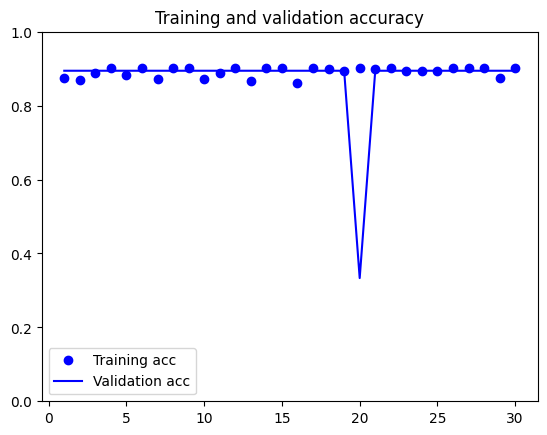

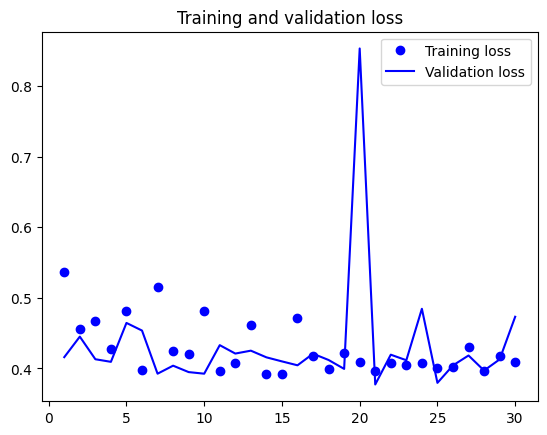

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.ylim(0,1)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
     


In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 25/100 ━━━━━━━━━━━━━━━━━━━━ 54s 728ms/step - acc: 0.8680 - loss: 0.4875

c:\Users\selloh\.conda\envs\tf-cpu\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - acc: 0.8754 - loss: 0.4367 - val_acc: 0.8943 - val_loss: 0.3970
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - acc: 0.8986 - loss: 0.3874 - val_acc: 0.8943 - val_loss: 0.3900
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - acc: 0.8833 - loss: 0.3995 - val_acc: 0.8943 - val_loss: 0.3832
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - acc: 0.8833 - loss: 0.4140 - val_acc: 0.8943 - val_loss: 0.4424
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - acc: 0.9033 - loss: 0.3821 - val_acc: 0.8943 - val_loss: 0.4100
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 213ms/step - acc: 0.8979 - loss: 0.4020 - val_acc: 0.8943 - val_loss: 0.3854
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 215ms/step - acc: 0.8998 - loss: 0.3972 - val_acc: 0.8943 - val_loss: 0.4116
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - acc: 0.9037 - loss: 0.4058 - val_acc: 0.8943 - val_loss: 0.3961
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s

In [29]:
model.save('DrivFace-ResNet.h5')
